<a href="https://colab.research.google.com/github/MGHiremath028/Machine-Learning/blob/main/XGBoost_GradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Selling Dataset Analysis

This notebook demonstrates the use of **Gradient Boosting** and **XGBoost** algorithms for regression and classification tasks. We will use a car selling dataset for this analysis.

### Steps:
1. Load and explore the dataset
2. Perform Exploratory Data Analysis (EDA)
3. Prepare the data for modeling
4. Train and evaluate Gradient Boosting and XGBoost models
5. Hyperparameter tuning and visualization.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
file_path = "car_sales_dataset.csv"  # Path to the dataset
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Car_Model,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Model A,2015,300000,500000,25000,Petrol,Dealer,Manual,0
1,Model B,2016,250000,480000,40000,Diesel,Individual,Manual,1
2,Model C,2017,200000,450000,35000,Petrol,Dealer,Automatic,0
3,Model D,2018,350000,520000,20000,Diesel,Dealer,Manual,0
4,Model E,2019,400000,600000,15000,Petrol,Individual,Automatic,0


## Data Exploration and Visualization

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Model      5 non-null      object
 1   Year           5 non-null      int64 
 2   Selling_Price  5 non-null      int64 
 3   Present_Price  5 non-null      int64 
 4   Kms_Driven     5 non-null      int64 
 5   Fuel_Type      5 non-null      object
 6   Seller_Type    5 non-null      object
 7   Transmission   5 non-null      object
 8   Owner          5 non-null      int64 
dtypes: int64(5), object(4)
memory usage: 488.0+ bytes

Descriptive Statistics:

              Year  Selling_Price  Present_Price    Kms_Driven     Owner
count     5.000000       5.000000       5.000000      5.000000  5.000000
mean   2017.000000  300000.000000  510000.000000  27000.000000  0.200000
std       1.581139   79056.941504   56568.542495  10368.220677  0.447214
min    2015.000000  200000.00000

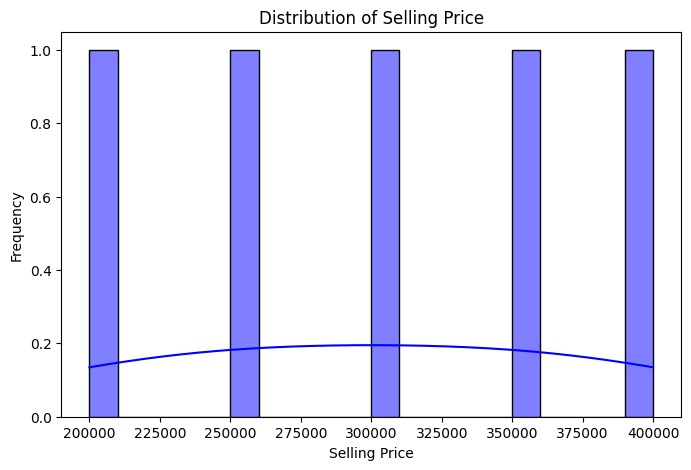

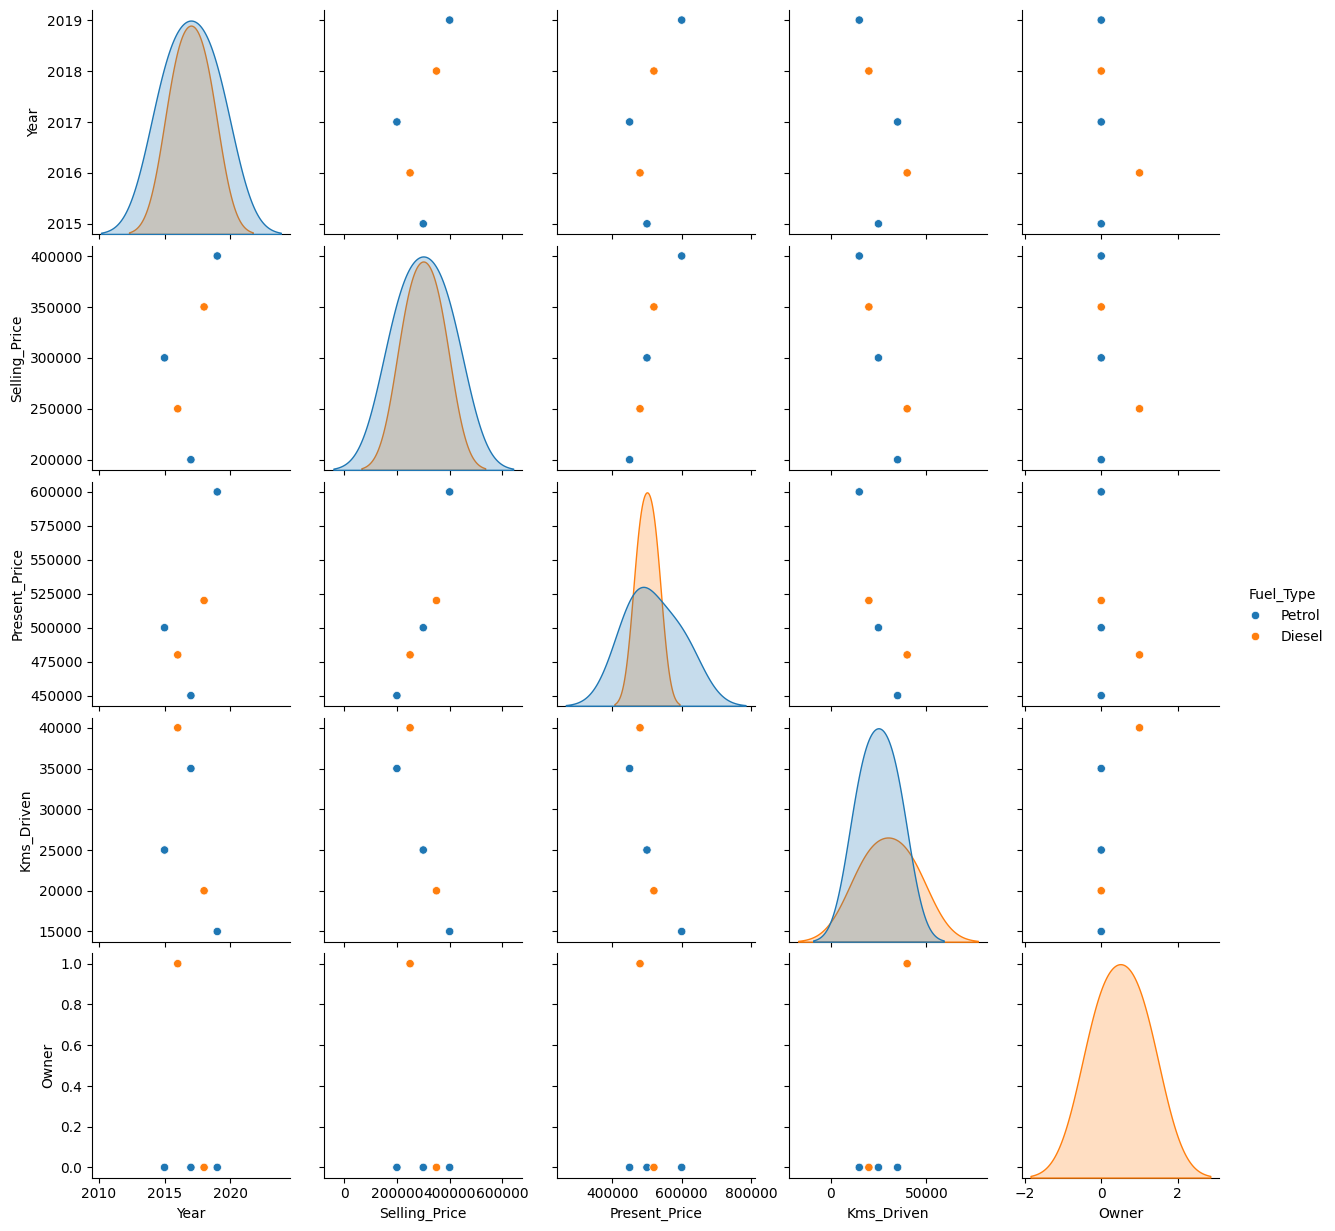

In [2]:
# Check for null values and data types
print("Dataset Information:\n")
df.info()

# Descriptive statistics
print("\nDescriptive Statistics:\n")
print(df.describe())

# Visualize the distribution of selling price
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], kde=True, color='blue', bins=20)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df, hue="Fuel_Type", diag_kind="kde")
plt.show()


## Data Preprocessing

In [3]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df_encoded.drop("Selling_Price", axis=1)
y = df_encoded["Selling_Price"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data prepared.")

Training and testing data prepared.


## Gradient Boosting

In [4]:
# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predictions
y_pred = gbr.predict(X_test)

# Evaluation
print("Gradient Boosting Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")


Gradient Boosting Performance:
Mean Squared Error: 39303248.37
Mean Absolute Error: 6269.23
R2 Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## XGBoost

In [5]:
# Train XGBoost Regressor
xgbr = XGBRegressor(random_state=42, verbosity=0)
xgbr.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgbr.predict(X_test)

# Evaluation
print("XGBoost Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_xgb):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_xgb):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_xgb):.2f}")


XGBoost Performance:
Mean Squared Error: 2500003125.00
Mean Absolute Error: 50000.03
R2 Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Hyperparameter Tuning

In [8]:
import warnings
warnings.filterwarnings("ignore")
# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42, verbosity=0), param_grid=param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters for XGBoost:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print(f"Optimized R2 Score: {r2_score(y_test, y_pred_best):.2f}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Optimized R2 Score: nan
